# Importing Libraries

In [57]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image 

# FAZENDO O DOWNLOAD DO DATASET
!pip install wget
!wget https://raw.githubusercontent.com/SamuelOliveira/FT084A/main/placement.csv --output-document=placement.csv

# IMPORTANDO O DATASET PARA O DATAFRAME
df = pd.read_csv('placement.csv', delimiter=',')

# LISTANDO 10 PRIMEIRAS AMOSTRAS
print(df.head(-1))

# PEGANDO OS NUMEROS DE COLUNAS
count_col = df.shape[1]

# PEGANDO OS NÚMEROS DE REGISTROS
count_row = df.shape[0]

print('\n')

print('Quantidade de campos(colunas): ', count_col)
print('Total de registros:', count_row)

--2021-04-15 03:49:21--  https://raw.githubusercontent.com/SamuelOliveira/FT084A/main/placement.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17075 (17K) [text/plain]
Saving to: ‘placement.csv’

placement.csv       100%[===================>]  16.67K  --.-KB/s    in 0s      

2021-04-15 03:49:22 (77.0 MB/s) - ‘placement.csv’ saved [17075/17075]

     sl_no gender  ssc_p    ssc_b  ...  etest_p specialisation  mba_p      status
0        1      M  67.00   Others  ...     55.0         Mkt&HR  58.80      Placed
1        2      M  79.33  Central  ...     86.5        Mkt&Fin  66.28      Placed
2        3      M  65.00  Central  ...     75.0        Mkt&Fin  57.80      Placed
3        4      M  56.00  Central  ...     66.0         Mkt&HR  59.43  Not Placed
4    

# Preprocessing of data:
First we have to check that dataset contain any null value or not if it contain we have to apply the some transformation into it.

In [58]:
df.isnull().sum()
# print("\n")
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# Data Visualization:
It aims to communicate data clearly & efficiently through graphical representation.

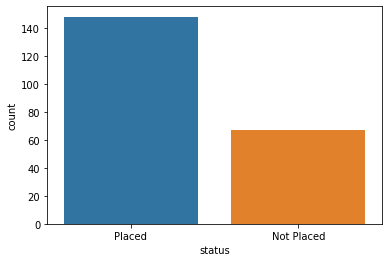

In [59]:
sns.countplot(x='status',data=df)

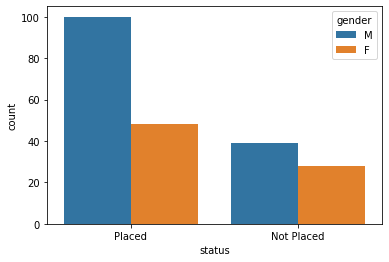

In [60]:
sns.countplot(x='status',hue='gender',data = df)

Convert categorical variable into indicator variables

In [61]:
workexp= pd.get_dummies(df['workex'])
workexp

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
210,1,0
211,1,0
212,0,1
213,1,0


Concatenate the data into original dataset.

In [62]:
df=pd.concat([df,workexp],axis=1)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,No,Yes
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,1,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,1,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,1,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,1,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,1,0


In [63]:
df.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,No,Yes
0,67.00,91.00,58.00,55.0,58.80,Placed,1,0
1,79.33,78.33,77.48,86.5,66.28,Placed,0,1
2,65.00,68.00,64.00,75.0,57.80,Placed,1,0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0
4,85.80,73.60,73.30,96.8,55.50,Placed,1,0
...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,1,0
211,58.00,60.00,72.00,74.0,53.62,Placed,1,0
212,67.00,67.00,73.00,59.0,69.72,Placed,0,1
213,74.00,66.00,58.00,70.0,60.23,Placed,1,0


# Training and testing data

In [64]:
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

# Apply the Naive Bayes theorem

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
nome_classes = model.classes_

print(nome_classes);

['Not Placed' 'Placed']


# Compare the actual status and predicted status

In [66]:
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1

,Actual Status,Predicted Status
207,Placed,Placed
25,Not Placed,Not Placed
164,Placed,Placed
109,Not Placed,Placed
83,Placed,Placed
...,...,...
101,Placed,Placed
140,Placed,Placed
196,Placed,Placed
111,Not Placed,Not Placed


# Classification Report:
A Classification report is used to measure the quality of predictions from a classification algorithm.

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.82      0.82      0.82        22
      Placed       0.91      0.91      0.91        43

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



Matriz de Confusão sem normalizacão 
[[18  4]
 [ 4 39]]


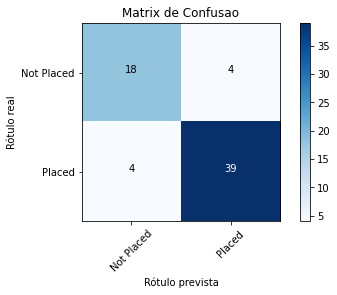

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')